In [ ]:
"""
1.Handle missing values as per the best practices (imputation, removal, etc.).

●Apply scaling techniques to numerical features:
a.Standard Scaling   b. Min-Max Scaling
●Discuss the scenarios where each scaling technique is preferred and why.

"""

In [45]:
import pandas as pd

In [46]:
df=pd.read_csv("adult_with_headers (1).csv")

In [47]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [49]:
df.shape

(32561, 15)

In [50]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [51]:
df.duplicated().sum()

np.int64(24)

In [54]:
df = df.drop_duplicates()

In [55]:
df.shape

(32537, 15)

In [56]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


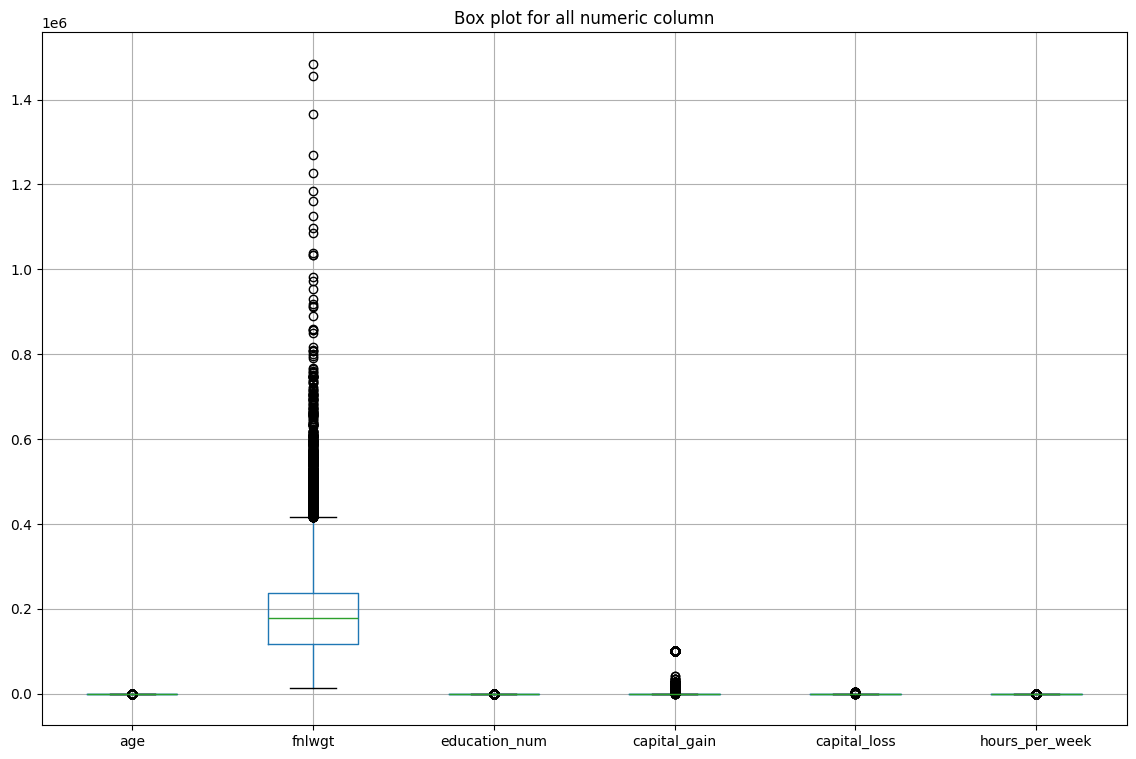

In [57]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(14,9))
plt.title("Box plot for all numeric column")
plt.show()

In [58]:
#outlier detection

In [75]:
import numpy as np
numeric_cols = df.select_dtypes(include=np.number).columns
    

In [76]:
numeric_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [80]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1
    le = Q1 - 1.5 * IQR
    ue = Q3 + 1.5 * IQR

    outliers =  df[(df[col] < le )| (df[col] > ue) ]
print(f"{col}: {len(outliers)} outliers")

hours_per_week: 5227 outliers


In [81]:
# Outlier capping function
def outlier_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[column] = df[column].apply(
        lambda x: lower_limit if x < lower_limit 
        else upper_limit if x > upper_limit 
        else x
    )

# Apply outlier capping to all numeric columns
for column in df.select_dtypes(include=['int', 'float']).columns:
    outlier_capping(df, column)

In [83]:
df.shape

(23535, 15)

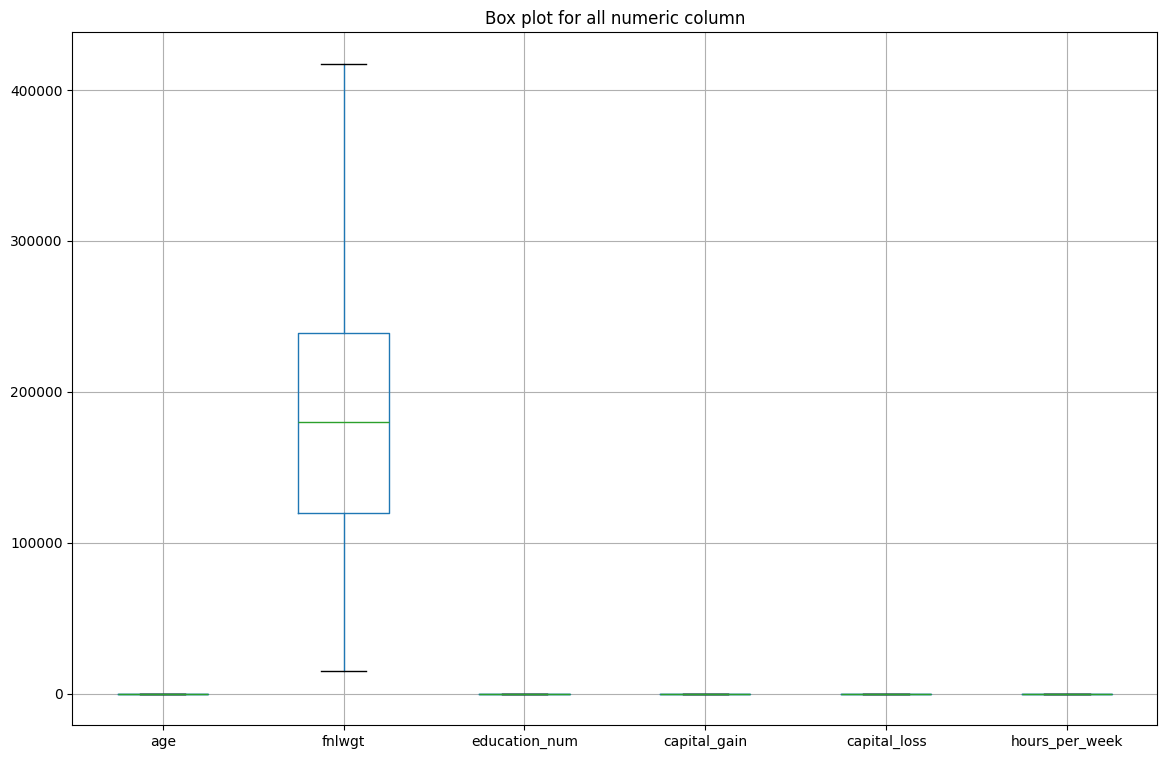

In [84]:
#After treatment of outlier boxplot

import matplotlib.pyplot as plt
df.boxplot(figsize=(14,9))
plt.title("Box plot for all numeric column")
plt.show()

In [ ]:
#For Scaling purpose

In [85]:
df_num = df.select_dtypes(include='number')

In [86]:
df_num.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39.0,77516.0,13.0,0.0,0.0,40.0
2,38.0,215646.0,9.0,0.0,0.0,40.0
3,53.0,234721.0,7.0,0.0,0.0,40.0
4,28.0,338409.0,13.0,0.0,0.0,40.0
5,37.0,284582.0,14.0,0.0,0.0,40.0


In [90]:
df_array=df_num.values

In [91]:
df_array

array([[3.90000e+01, 7.75160e+04, 1.30000e+01, 0.00000e+00, 0.00000e+00,
        4.00000e+01],
       [3.80000e+01, 2.15646e+05, 9.00000e+00, 0.00000e+00, 0.00000e+00,
        4.00000e+01],
       [5.30000e+01, 2.34721e+05, 7.00000e+00, 0.00000e+00, 0.00000e+00,
        4.00000e+01],
       ...,
       [4.00000e+01, 1.54374e+05, 9.00000e+00, 0.00000e+00, 0.00000e+00,
        4.00000e+01],
       [5.80000e+01, 1.51910e+05, 9.00000e+00, 0.00000e+00, 0.00000e+00,
        4.00000e+01],
       [5.20000e+01, 2.87927e+05, 9.00000e+00, 0.00000e+00, 0.00000e+00,
        4.00000e+01]], shape=(23535, 6))

In [ ]:
#StandardScalling

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(df_array)


,copy,True
,with_mean,True
,with_std,True


In [97]:
sc.fit_transform(df_array)

array([[ 0.01475418, -1.16869552,  1.14620436,  0.        ,  0.        ,
        -0.40292123],
       [-0.06668099,  0.28400576, -0.44295143,  0.        ,  0.        ,
        -0.40292123],
       [ 1.15484645,  0.48461589, -1.23752933,  0.        ,  0.        ,
        -0.40292123],
       ...,
       [ 0.09618934, -0.36038657, -0.44295143,  0.        ,  0.        ,
        -0.40292123],
       [ 1.56202226, -0.38630025, -0.44295143,  0.        ,  0.        ,
        -0.40292123],
       [ 1.07341129,  1.04417879, -0.44295143,  0.        ,  0.        ,
        -0.40292123]], shape=(23535, 6))

In [ ]:
#MinMaxScalling

In [98]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

mm.fit(df_array)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [99]:
mm.fit_transform(df_array)

array([[0.38596491, 0.15563135, 0.76923077, 0.        , 0.        ,
        0.375     ],
       [0.36842105, 0.4988313 , 0.46153846, 0.        , 0.        ,
        0.375     ],
       [0.63157895, 0.54622534, 0.30769231, 0.        , 0.        ,
        0.375     ],
       ...,
       [0.40350877, 0.34659393, 0.46153846, 0.        , 0.        ,
        0.375     ],
       [0.71929825, 0.34047184, 0.46153846, 0.        , 0.        ,
        0.375     ],
       [0.61403509, 0.6784218 , 0.46153846, 0.        , 0.        ,
        0.375     ]], shape=(23535, 6))

In [ ]:
# Discuss the scenarios where each scaling technique is preferred and why.
Ans: 1.Scenarios for StandardScaler

      a) When your data is normally distributed (Gaussian-like).
 
      b) Works well for distance-based algorithms that assume features are centered (e.g., K-Means, PCA, Logistic Regression, SVM).

      c) Useful when outliers are not extreme.

     2. Scenarios for MinMaxScaler 

      a) When you need all features in the same scale (0 to 1).

      b) Useful for neural networks or gradient-based models (e.g., ANN, deep learning) — because they converge faster when data is bounded.

      c) Good when you don’t have many outliers, since it’s sensitive to them.

In [ ]:
"""
2. Encoding Techniques:

●Apply One-Hot Encoding to categorical variables with less than 5 categories.
●Use Label Encoding for categorical variables. Data Exploration and Preprocessing:
●Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
●les with more than 5 categories.
●Discuss the pros and cons of One-Hot Encoding and Label Encoding.
"""

In [ ]:
#Label Encoding

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['sex'])

LabelEncoder()

In [104]:
df['sex'] = le.fit_transform(df['sex'])

In [105]:
df['sex']

0        1
2        1
3        1
4        0
5        0
        ..
32555    1
32556    0
32557    1
32558    0
32560    0
Name: sex, Length: 23535, dtype: int64

In [106]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,1,0.0,0.0,40.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,1,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.0,0.0,40.0,Cuba,<=50K
5,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,0,0.0,0.0,40.0,United-States,<=50K


In [ ]:
#One-Hot Encoding

In [110]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()

oe_x = oe.fit(df[['sex']])

In [111]:
oe_x

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [119]:
encode = oe_x.transform(df[['sex']]).toarray().astype('int')

In [134]:
print(encode)

[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [1 0]
 [1 0]]


In [139]:
encoded_data = pd.DataFrame(encode,columns=['Female', 'Male']).astype('int')

In [140]:
print(encoded_data)

       Female  Male
0           0     1
1           0     1
2           0     1
3           1     0
4           1     0
...       ...   ...
23530       0     1
23531       1     0
23532       0     1
23533       1     0
23534       1     0

[23535 rows x 2 columns]


In [141]:
final_data = df.join(encoded_data)

In [142]:
final_data = final_data.drop('sex', axis=1)

In [143]:
print(final_data)

        age      workclass    fnlwgt      education  education_num  \
0      39.0      State-gov   77516.0      Bachelors           13.0   
2      38.0        Private  215646.0        HS-grad            9.0   
3      53.0        Private  234721.0           11th            7.0   
4      28.0        Private  338409.0      Bachelors           13.0   
5      37.0        Private  284582.0        Masters           14.0   
...     ...            ...       ...            ...            ...   
32555  22.0        Private  310152.0   Some-college           10.0   
32556  27.0        Private  257302.0     Assoc-acdm           12.0   
32557  40.0        Private  154374.0        HS-grad            9.0   
32558  58.0        Private  151910.0        HS-grad            9.0   
32560  52.0   Self-emp-inc  287927.0        HS-grad            9.0   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
2          

In [145]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23535 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             23535 non-null  float64
 1   workclass       23535 non-null  object 
 2   fnlwgt          23535 non-null  float64
 3   education       23535 non-null  object 
 4   education_num   23535 non-null  float64
 5   marital_status  23535 non-null  object 
 6   occupation      23535 non-null  object 
 7   relationship    23535 non-null  object 
 8   race            23535 non-null  object 
 9   capital_gain    23535 non-null  float64
 10  capital_loss    23535 non-null  float64
 11  hours_per_week  23535 non-null  float64
 12  native_country  23535 non-null  object 
 13  income          23535 non-null  object 
 14  Female          17015 non-null  float64
 15  Male            17015 non-null  float64
dtypes: float64(8), object(8)
memory usage: 3.1+ MB


In [148]:
final_data.shape

(23535, 16)

In [149]:
final_data.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
income             object
Female            float64
Male              float64
dtype: object

In [150]:
final_data.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income               0
Female            6520
Male              6520
dtype: int64

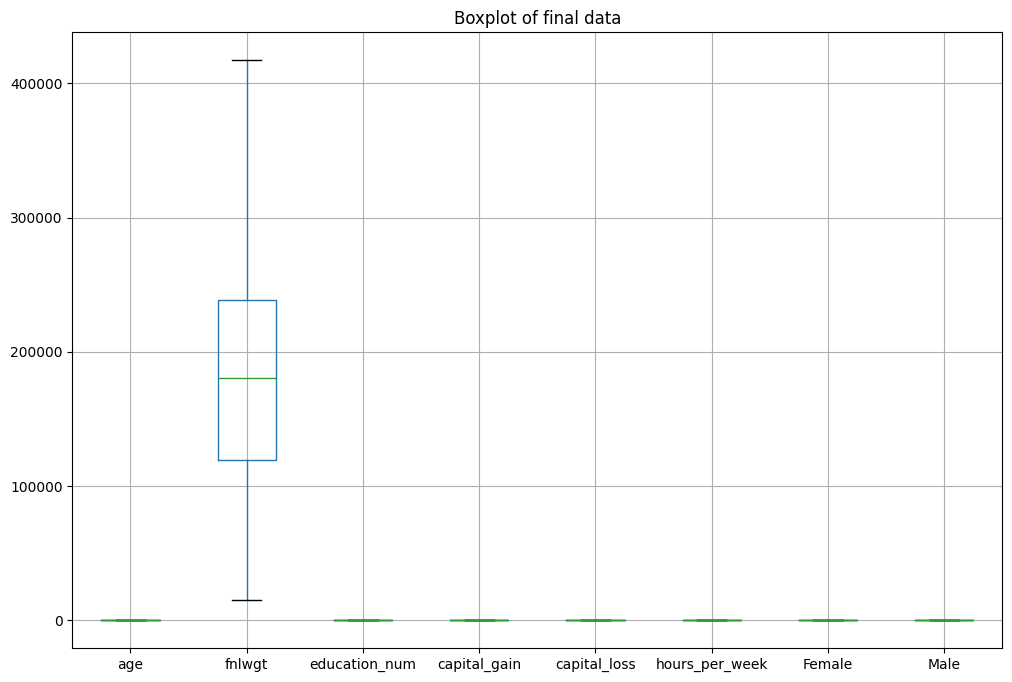

In [151]:
final_data.boxplot(figsize=(12,8))
plt.title("Boxplot of final data")
plt.show()

In [ ]:
#3. Feature Engineering:

""Create at least 2 new features that could be beneficial for the model and explain the rationale behind your choices.

Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.”"

In [153]:
#first feature added is age group

df = final_data
df['age_Group'] = pd.cut(df['age'], bins=[18, 25, 35, 50, 65],
                         labels=['Young', 'Mid-Adult', 'Experienced', 'Senior'])


In [156]:
#second feature added is weight per age
df['weight_per_age'] = df['fnlwgt'] / df['age']


In [157]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male,age_Group,weight_per_age
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,40.0,United-States,<=50K,0.0,1.0,Experienced,1987.589744
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,40.0,United-States,<=50K,0.0,1.0,Experienced,5674.894737
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,40.0,United-States,<=50K,1.0,0.0,Senior,4428.698113
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,40.0,Cuba,<=50K,1.0,0.0,Mid-Adult,12086.035714
5,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,0.0,0.0,40.0,United-States,<=50K,0.0,1.0,Experienced,7691.405405


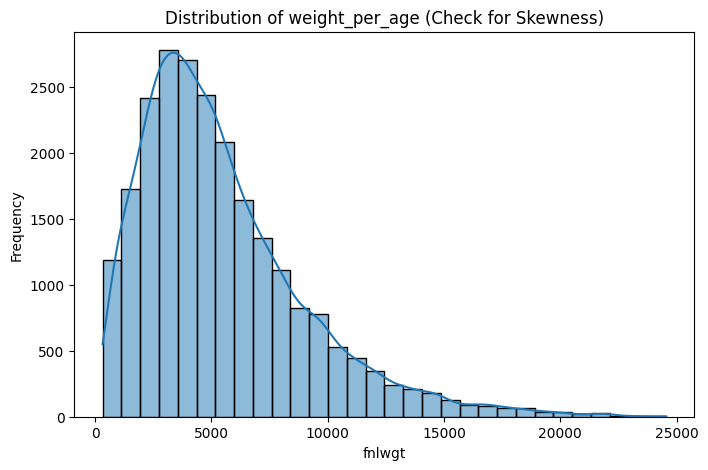

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: visualize skewness in 'fnlwgt'
plt.figure(figsize=(8,5))
sns.histplot(df['weight_per_age'], kde=True, bins=30)
plt.title('Distribution of weight_per_age (Check for Skewness)')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()


In [162]:
import numpy as np

df['weight_per_age_log'] = np.log1p(df['weight_per_age'])  


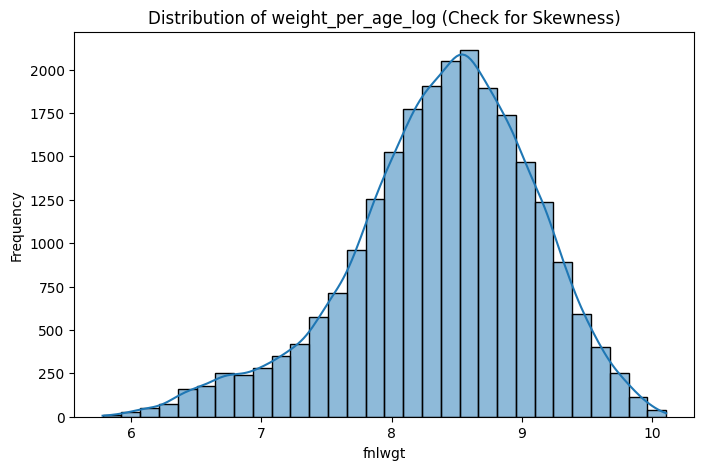

In [163]:
# Example: visualize skewness in 'fnlwgt'

plt.figure(figsize=(8,5))
sns.histplot(df['weight_per_age_log'], kde=True, bins=30)
plt.title('Distribution of weight_per_age_log (Check for Skewness)')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()
